In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [10]:
df_tmp = pd.DataFrame(np.random.randint(0, 1000, [2, 2000]), index=['a','b']).T.unstack().reset_index()

In [11]:
df_tmp.head()

,level_0,level_1,0
0,a,0,105
1,a,1,70
2,a,2,557
3,a,3,783
4,a,4,663


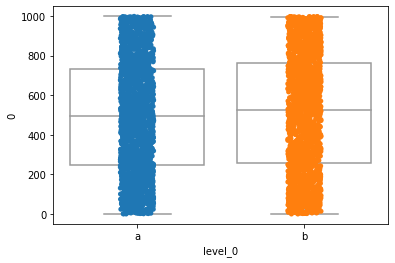

In [15]:
sns.boxplot(x='level_0', y=0, data=df_tmp, color='white')
sns.stripplot(x='level_0', y=0, data=df_tmp)
plt.show()

In [2]:
logfile = 'test/log'

In [9]:
with open(logfile, 'rt') as h:
    for i in h.readlines():
        if re.search("INFO:.+:\t", i):
            print(i.strip())

2021-03-09 12:09:56,899 INFO:L reads:	359278
2021-03-09 12:09:57,046 INFO:L reads after cut adapter/linkers:	284558
2021-03-09 12:10:00,396 INFO:L reads after fiter R1_F==R2_R and R1_R==R2_F:	257303
2021-03-09 12:10:00,845 INFO:L reads after fiter FBarcode!="F" or RBarcode!="R":	257300
2021-03-09 12:10:01,209 INFO:L reads after filter length(umi) between 10-20bp:	257165
2021-03-09 12:10:02,909 INFO:umi paires:	219929
2021-03-09 12:10:20,372 INFO:remain umiID different barcode:	10818
2021-03-09 12:10:20,373 INFO:remain umiID count:	15970
2021-03-09 12:10:20,373 INFO:repeat umiID different barcode:	5176
2021-03-09 12:10:20,373 INFO:repeat umiID count:	17827
2021-03-09 12:24:53,605 INFO:A reads:	9000000
2021-03-09 12:24:53,605 INFO:A reads with adapters:	8249440
2021-03-09 12:25:42,865 INFO:A reads with linkers:	7942746
2021-03-09 12:25:42,873 INFO:A reads with umi:	7897510
2021-03-09 12:25:42,873 INFO:A reads with umi In L:	3476354
2021-03-09 12:25:42,873 INFO:A reads with umi NotIn L:	4

In [2]:
a = '/root/data_size/resutl/DS0/analysis/'
b = '/root/data_size/resutl/DS0/analysis/A1.fastq.gz'
os.path.join(a,b)

'/root/data_size/resutl/DS0/analysis/A1.fastq.gz'

In [5]:
df = pd.DataFrame(np.random.randint(0,100,[10,2]))
df['index'] = range(10)

In [6]:
df

,0,1,index
0,73,7,0
1,65,32,1
2,30,0,2
3,59,62,3
4,93,8,4
5,96,7,5
6,88,73,6
7,79,65,7
8,65,13,8
9,81,79,9


In [54]:
text = ':'.join(df[0].describe().astype(int).astype(str).to_list())

In [55]:
text

'10:72:19:30:65:76:86:96'

Text(0, -11, '10:72:19:30:65:76:86:96')

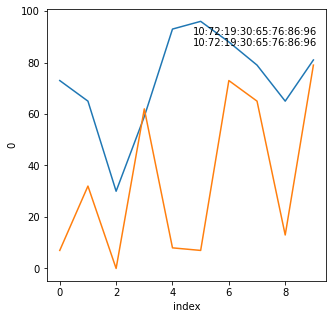

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.lineplot(x='index', y=0, data=df)
ax = sns.lineplot(x='index', y=1, data=df)
text_x = ax.get_xlim()[1]/2
text_y = ax.get_ylim()[1]*0.9
title = 'count'
plt.text(x=text_x, y=text_y, s=text)
plt.text(x=text_x, y=text_y, s=text)
plt.annotate(text, (text_x,text_y), (0, -11), textcoords='offset points')

In [2]:
df_LuID = pd.read_csv('test_L_uID_dropRepeat.csv', index_col=0)

In [28]:
df_LuID.drop_duplicates(subset=['umiID', 'Barcode']).groupby('Barcode')['Lreads'].agg(['count', np.sum, np.mean]).sort_values(by='count', ascending=False).head(20)

,count,sum,mean
Barcode,,,
F1|R4,7889,89313,11.321207
F1|R3,5159,56960,11.040899
F1|R2,4578,52217,11.406073
F1|R5,4276,43273,10.119972
F4|R4,4072,43577,10.701621
F7|R7,3536,38729,10.952771
F3|R3,2488,28178,11.325563
F5|R5,2247,24798,11.036048
F1|R1,764,8902,11.651832


In [187]:
df_LuID_count = df_LuID.drop_duplicates(subset=['umiID', 'Barcode']).groupby('Barcode')['Lreads'].agg(['count', np.sum, np.mean]).sort_values(by='count', ascending=False)

In [194]:
df_LuID_count[df_LuID_count.index.str.contains('F1')].head(4).sum()

count     21902.000000
sum      241763.000000
mean         43.888151
dtype: float64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_Aumi = pd.read_csv('test_A_umi_dropRepeat.csv', index_col=0)

/Users/yk/work/git/16S-FAST-Tools-2021/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [32]:
df_Aumi

(33749823, 3)

In [39]:
df_Aumiumi_count = df_Aumi.groupby(['Barcode','umi'])['AreadID'].count().reset_index()

In [40]:
df_Aumiumi_count['Barcode'].unique()

array(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'R1', 'R2', 'R3',
       'R4', 'R5', 'R6', 'R7', 'R8'], dtype=object)

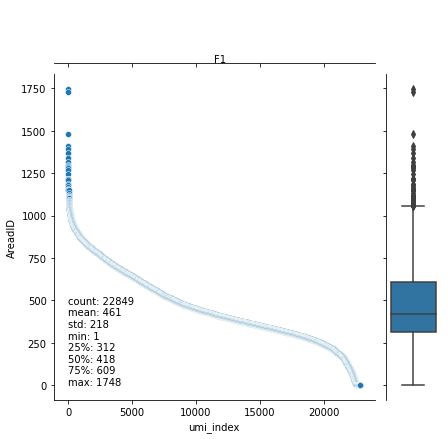

In [176]:
Barcode = 'F1'
def plot_barcode_AumiReads(df_Aumiumi_count, Barcode='F1'):
    tmp_count = df_Aumiumi_count[df_Aumiumi_count['Barcode']==Barcode]
    tmp_count = tmp_count.sort_values(by='AreadID', ascending=False)['AreadID']
    tmp_count = tmp_count.reset_index().drop('index', axis=1).reset_index()
    tmp_count = tmp_count.rename(columns={'index':'umi_index'})
    
    g = sns.JointGrid()
    x, y = tmp_count['umi_index'], tmp_count['AreadID']
    sns.scatterplot(x=x, y=y, ax=g.ax_joint)
    sns.boxplot(y=y, ax=g.ax_marg_y)
    
    data = y.describe().apply(lambda x: '{:.0f}'.format(x)).to_dict()
    s = '\n'.join([': '.join(i) for i in data.items()])
    g.ax_joint.text(x=0,y=0,s=s)
    g.ax_marg_x.text(x=x.median(),y=0,s=Barcode,)
    return g
plot_barcode_AumiReads(df_Aumiumi_count, Barcode=Barcode)
plt.show()

In [184]:
barcode_count = df_Aumiumi_count['Barcode'].value_counts()
barcode_list = barcode_count.index

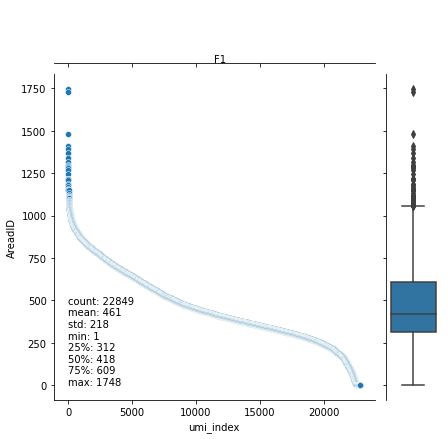

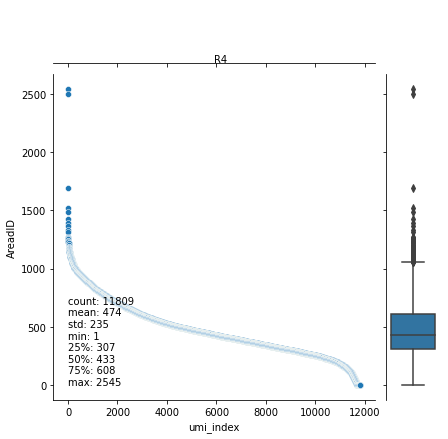

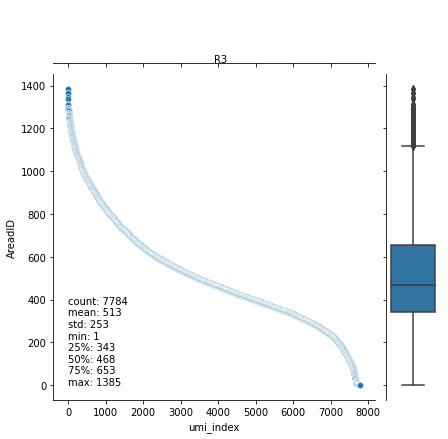

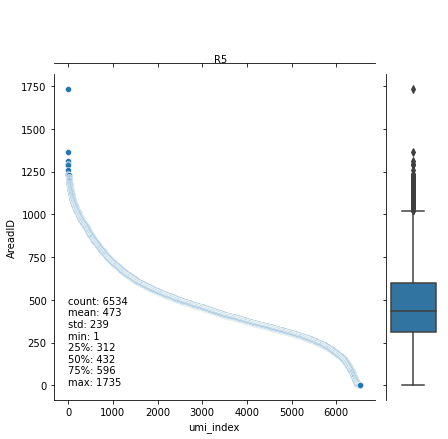

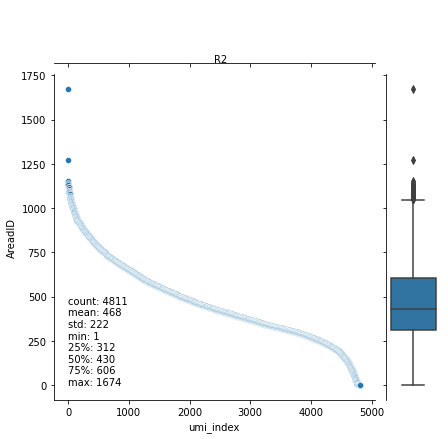

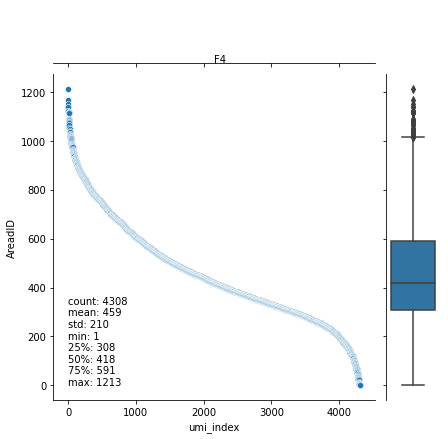

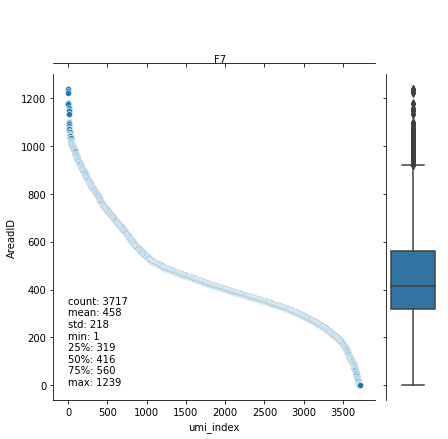

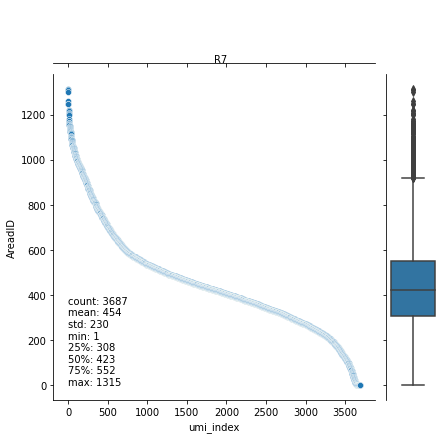

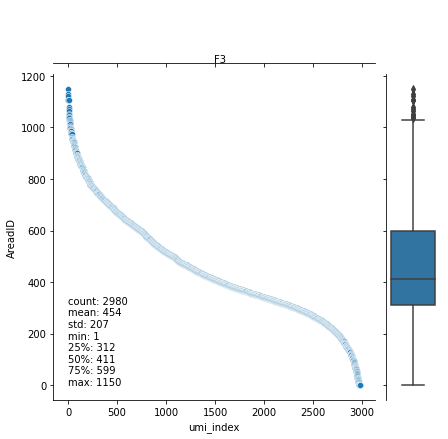

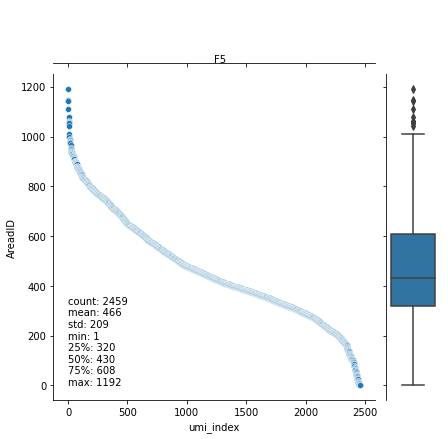

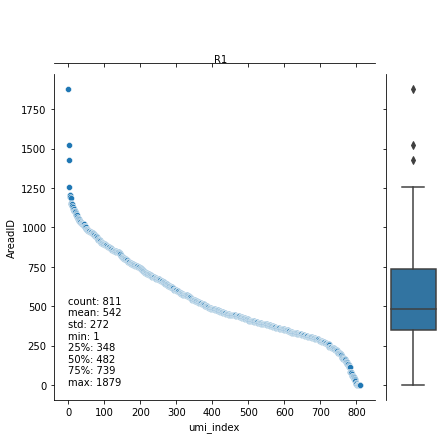

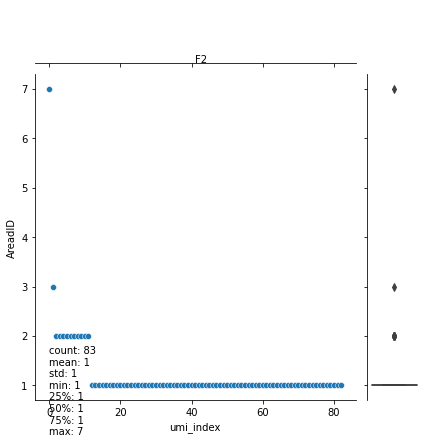

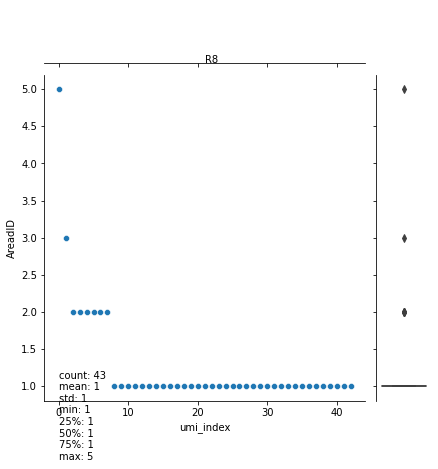

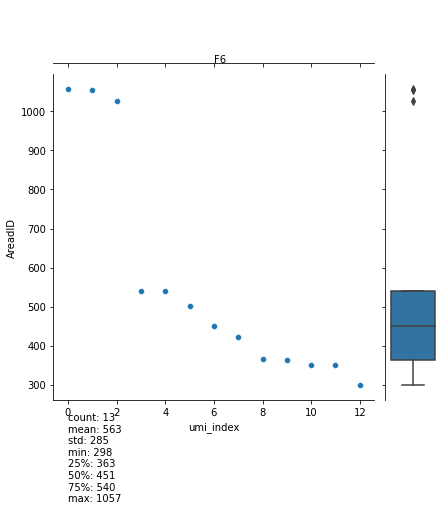

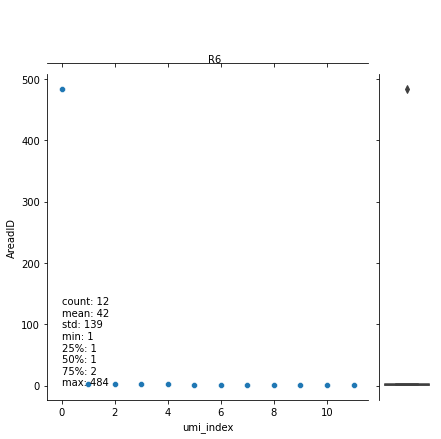

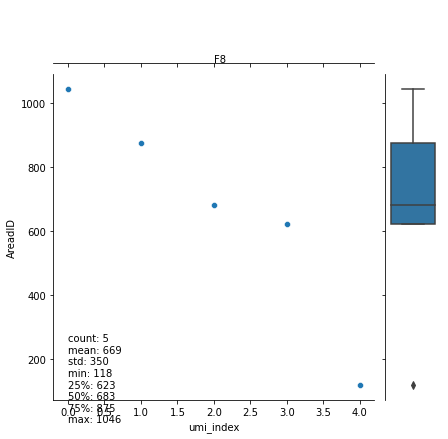

In [185]:
for Barcode in barcode_list:
    ax = plot_barcode_AumiReads(df_Aumiumi_count, Barcode=Barcode)
    ax.savefig(Barcode+'AumiReads.png')
    